## Credit Scoring Models

### Step-1 Importing required libraries

In [1]:
import numpy as np # for numerical operations
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for basic data visualization
import seaborn as sns # for advanced data visualization

# for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# for splitting data
from sklearn.model_selection import train_test_split

# for models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Step-2 Import dataset

In [2]:
df = pd.read_csv('C:\\Users\\1\\Desktop\\LoanDataset - LoansDatasest.csv')

In [3]:
df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"£5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"£17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"£35,000.00",10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"£15,000.00",11.48,6,NaN,26,NO DEFAULT


### Step-3 Data preprocessing

In [4]:
# handling null values
df.isna().sum().sort_values()

customer_age               0
customer_income            0
home_ownership             0
loan_intent                0
loan_grade                 0
term_years                 0
cred_hist_length           0
loan_amnt                  1
customer_id                3
Current_loan_status        4
employment_duration      895
loan_int_rate           3116
historical_default     20737
dtype: int64

In [5]:
#historicol_default has more no. of null values so it's better to remove this column
del df["historical_default"]

In [6]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,4,DEFAULT


In [7]:
#knowing the data types
df.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [8]:
#handling missing values with imputation strategy
imputer = SimpleImputer(strategy = 'mean')
values = imputer.fit_transform(df[['loan_int_rate','employment_duration']])
mini_df = pd.DataFrame(values,columns = ['loan_int_rate','employment_duration'])

In [9]:
df[['loan_int_rate','employment_duration']] = mini_df

In [10]:
df.isna().sum()

customer_id            3
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              1
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    4
dtype: int64

In [11]:
# now dropping the remaining null values
df.dropna(inplace=True)
df = df.reset_index()

In [12]:
df.isna().sum()

index                  0
customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [13]:
del df['index']

In [14]:
df.isna().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [15]:
#handling the categorical value
df['home_ownership'].value_counts()

home_ownership
RENT        16447
MORTGAGE    13441
OWN          2583
OTHER         107
Name: count, dtype: int64

For the home_ownership column, we will encode the categories, treating them as ordinal classes.

Ordinal classification involves assigning a meaningful order to categories. For home ownership, the order typically reflects increasing stability or permanence of the living situation. Here's a plausible ordinal classification for the given classes:

RENT: Renting is usually the least permanent and stable form of home ownership.
OTHER: This category could include less common and potentially less stable arrangements than renting, but this can vary based on specific definitions.
MORTGAGE: Having a mortgage implies a long-term commitment and a step towards owning the home.
OWN: Fully owning a home represents the most stable and permanent form of home ownership.
Thus, the ordinal classification from least to most stable/permanent would be:
RENT
OTHER
MORTGAGE
OWN

In [16]:
df["home_ownership"].replace(["RENT","OTHER","MORTGAGE","OWN"],[1,2,3,4],inplace=True)

/tmp/ipykernel_18/2939452490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["home_ownership"].replace(["RENT","OTHER","MORTGAGE","OWN"],[1,2,3,4],inplace=True)
/tmp/ipykernel_18/2939452490.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["home_ownership"].replace(["RENT","OTHER","MORTGAGE","OWN"],[1,2,3,4],inplace=True)

In [17]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6072
VENTURE              5717
PERSONAL             5519
DEBTCONSOLIDATION    5211
HOMEIMPROVEMENT      3606
Name: count, dtype: int64

In [18]:
df_extended1=pd.get_dummies(df["loan_intent"])
df[df_extended1.columns]=df_extended1

In [19]:
df.isna().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
DEBTCONSOLIDATION      0
EDUCATION              0
HOMEIMPROVEMENT        0
MEDICAL                0
PERSONAL               0
VENTURE                0
dtype: int64

In [20]:
del df['loan_intent']

In [21]:
df.shape

(32578, 17)

In [22]:
# converting data from string type to float
li=[]
for i in range(32578):
    s=""
    for i in df["loan_amnt"][i]:
        if i!=',' and i!='£':
            s=s+i
    li.append(float(s))

ri=[]
for i in range(32578):
    g=""
    for i in df["customer_income"][i]:
        if i!=',' and i!='£':
            g=g+i
    ri.append(int(g))

In [23]:
df['loan_amount'] = pd.DataFrame(li)
df['customer_income'] = pd.DataFrame(ri)

In [24]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_amount
0,1.0,22,59000,1,123.0,C,"£35,000.00",16.02,10,3,DEFAULT,False,False,False,False,True,False,35000.0
1,2.0,21,9600,4,5.0,A,"£1,000.00",11.14,1,2,NO DEFAULT,False,True,False,False,False,False,1000.0
2,3.0,25,9600,3,1.0,B,"£5,500.00",12.87,5,3,DEFAULT,False,False,False,True,False,False,5500.0
3,4.0,23,65500,1,4.0,B,"£35,000.00",15.23,10,2,DEFAULT,False,False,False,True,False,False,35000.0
4,5.0,24,54400,1,8.0,B,"£35,000.00",14.27,10,4,DEFAULT,False,False,False,True,False,False,35000.0


In [25]:
df.drop(columns=['loan_amnt'],inplace=True)

In [26]:
df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_amount
0,1.0,22,59000,1,123.0,C,16.02,10,3,DEFAULT,False,False,False,False,True,False,35000.0
1,2.0,21,9600,4,5.0,A,11.14,1,2,NO DEFAULT,False,True,False,False,False,False,1000.0
2,3.0,25,9600,3,1.0,B,12.87,5,3,DEFAULT,False,False,False,True,False,False,5500.0
3,4.0,23,65500,1,4.0,B,15.23,10,2,DEFAULT,False,False,False,True,False,False,35000.0
4,5.0,24,54400,1,8.0,B,14.27,10,4,DEFAULT,False,False,False,True,False,False,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32577.0,57,53000,3,1.0,C,13.16,7,30,NO DEFAULT,False,False,False,False,True,False,5800.0
32574,32578.0,54,120000,3,4.0,A,7.49,4,19,NO DEFAULT,False,False,False,False,True,False,17625.0
32575,32579.0,65,76000,1,3.0,B,10.99,5,28,DEFAULT,False,False,True,False,False,False,35000.0
32576,32580.0,56,150000,3,5.0,B,11.48,6,26,NO DEFAULT,False,False,False,False,True,False,15000.0


In [27]:
# current loan status column
df['Current_loan_status'].value_counts()

Current_loan_status
NO DEFAULT    25740
DEFAULT        6838
Name: count, dtype: int64

In [28]:
df['Current_loan_status'].replace(['NO DEFAULT','DEFAULT'],[0,1],inplace=True)

/tmp/ipykernel_18/2427449231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Current_loan_status"].replace(["NO DEFAULT","DEFAULT"],[0,1],inplace=True)
/tmp/ipykernel_18/2427449231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Current_loan_status"].replace(["NO DEFAULT","DEFAULT"],[0,1],inplace=True)

In [29]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_amount
0,1.0,22,59000,1,123.0,C,16.02,10,3,1,False,False,False,False,True,False,35000.0
1,2.0,21,9600,4,5.0,A,11.14,1,2,0,False,True,False,False,False,False,1000.0
2,3.0,25,9600,3,1.0,B,12.87,5,3,1,False,False,False,True,False,False,5500.0
3,4.0,23,65500,1,4.0,B,15.23,10,2,1,False,False,False,True,False,False,35000.0
4,5.0,24,54400,1,8.0,B,14.27,10,4,1,False,False,False,True,False,False,35000.0


In [30]:
df.replace([True,False],[1,0],inplace=True)
# the class which is to be predicted

In [31]:
df['loan_grade'].value_counts()

loan_grade
A    15660
B     9060
C     4925
D     2628
E      305
Name: count, dtype: int64

### Step-4 Exploratory Data Analysis

Text(0, 0.5, 'number of instances of the class')

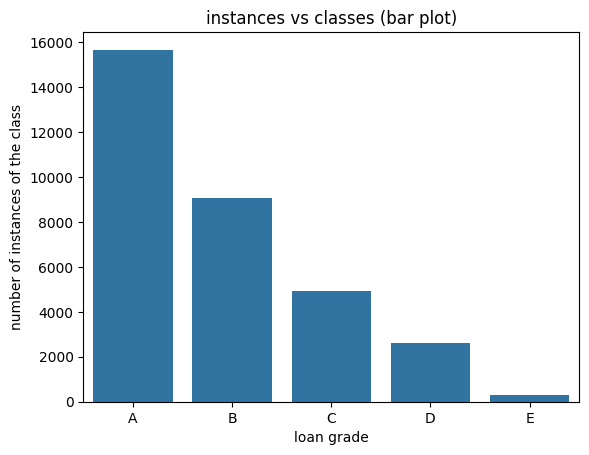

In [32]:
plt.title("instances vs classes (bar plot)")
sns.barplot(x=["A","B","C","D","E"],y=[15660,9060,4925,2628,308])
plt.xlabel("loan grade")
plt.ylabel("number of instances of the class")

([<matplotlib.patches.Wedge at 0x168c7116060>,
 [Text(0.06683376403045209, 1.0979677809414639, 'A'),
  Text(-0.8033480986212534, -0.7514198775928256, 'B'),
  Text(0.5558071475277999, -0.9492515023727961, 'C'),
  Text(1.0466232975932033, -0.3384961933835143, 'D'),
  Text(1.0995149266203361, -0.03266383533936832, 'E')],
 [Text(0.03645478038024659, 0.598891516877162, '48.1%'),
  Text(-0.43818987197522913, -0.4098653877779048, '27.8%'),
  Text(0.3031675350151635, -0.5177735467487978, '15.1%'),
  Text(0.570885435050838, -0.18463428730009868, '8.1%'),
  Text(0.5997354145201832, -0.017816637457837264, '0.9%')])

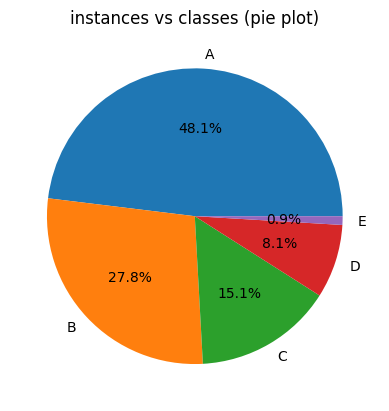

In [33]:
plt.title("instances vs classes (pie plot)")
plt.pie([15660,9060,4925,2628,308],labels=["A","B","C","D","E"],autopct='%1.1f%%')

In [34]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_amount
0,1.0,22,59000,1,123.0,C,16.02,10,3,1,0,0,0,0,1,0,35000.0
1,2.0,21,9600,4,5.0,A,11.14,1,2,0,0,1,0,0,0,0,1000.0
2,3.0,25,9600,3,1.0,B,12.87,5,3,1,0,0,0,1,0,0,5500.0
3,4.0,23,65500,1,4.0,B,15.23,10,2,1,0,0,0,1,0,0,35000.0
4,5.0,24,54400,1,8.0,B,14.27,10,4,1,0,0,0,1,0,0,35000.0


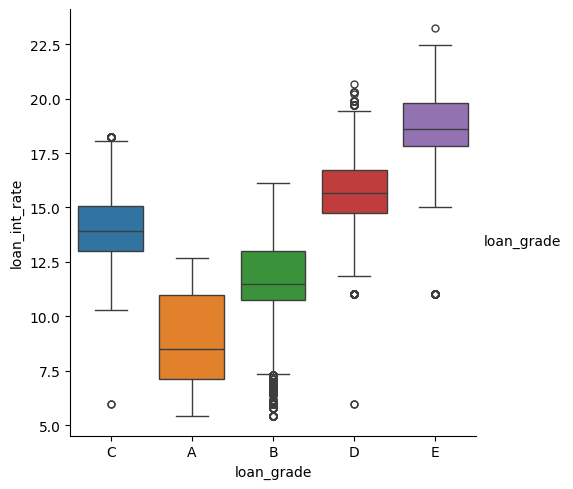

In [35]:
#loan_grade vs loan_int_rate (box plot)
sns.catplot(x="loan_grade",y="loan_int_rate",data=df,kind="box",hue="loan_grade")

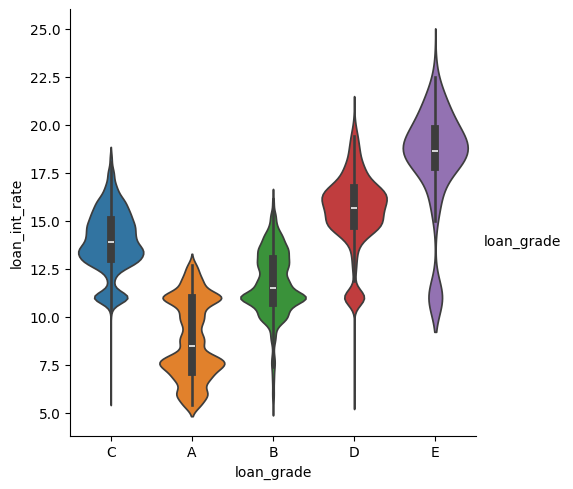

In [36]:
#loan_grade vs loan_int_rate (violin plot)
sns.catplot(x="loan_grade",y="loan_int_rate",data=df,kind="violin",hue="loan_grade")

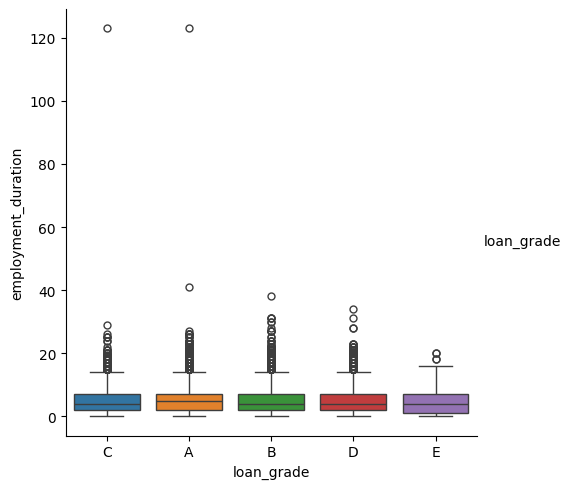

In [37]:
#loan_grade vs employement_duration (box plot)
sns.catplot(x="loan_grade",y="employment_duration",data=df,kind="box",hue="loan_grade")

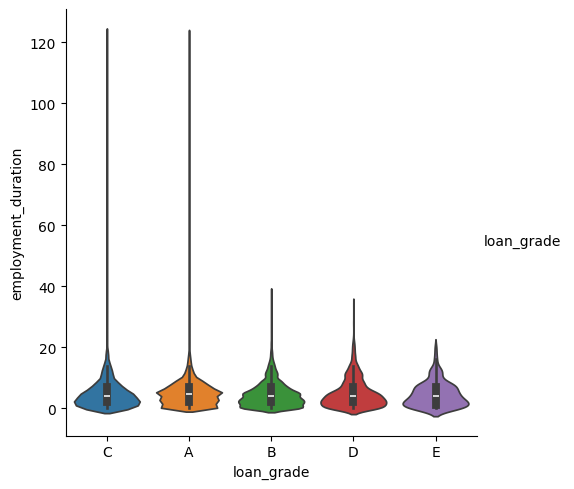

In [38]:
#loan_grade vs employement_duration (violin plot)
sns.catplot(x="loan_grade",y="employment_duration",data=df,kind="violin",hue="loan_grade")

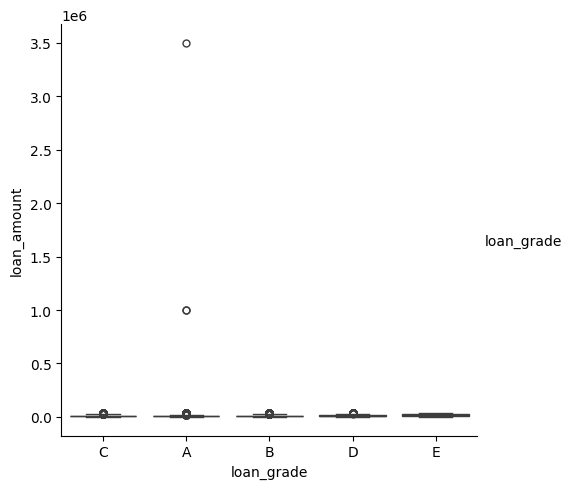

In [39]:
#loan_grade vs loan_amnt (box plot)
sns.catplot(x="loan_grade",y="loan_amount",data=df,kind="box",hue="loan_grade")

In [41]:
print(df.columns)

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_grade', 'loan_int_rate', 'term_years',
       'cred_hist_length', 'Current_loan_status', 'DEBTCONSOLIDATION',
       'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE',
       'loan_amount'],
      dtype='object')


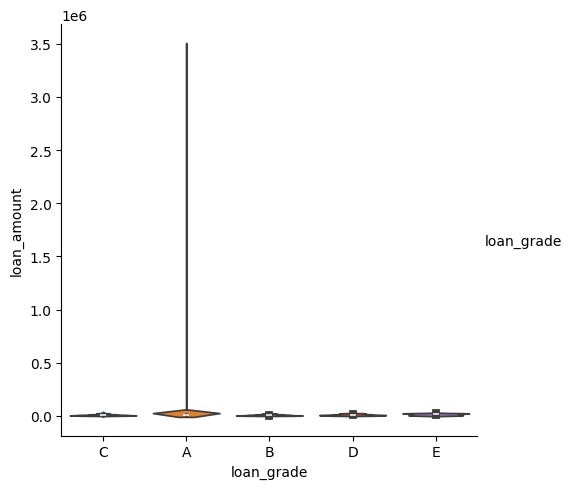

In [42]:
#loan_grade vs loan_amnt (violin plot)

sns.catplot(x="loan_grade",y="loan_amount",data=df,kind="violin",hue="loan_grade")

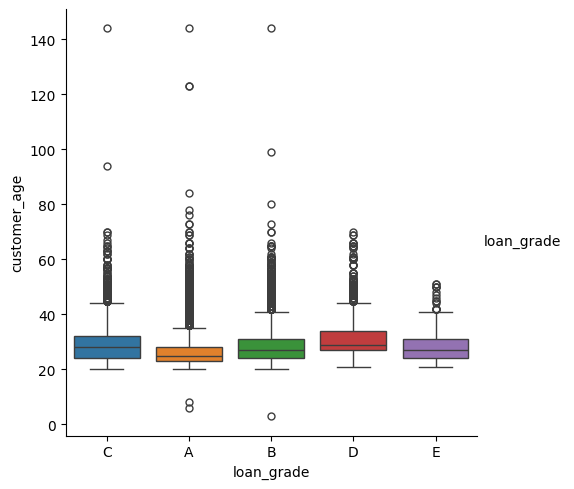

In [43]:
#loan_grade vs customer_age (box plot)

sns.catplot(x="loan_grade",y="customer_age",data=df,kind="box",hue="loan_grade")

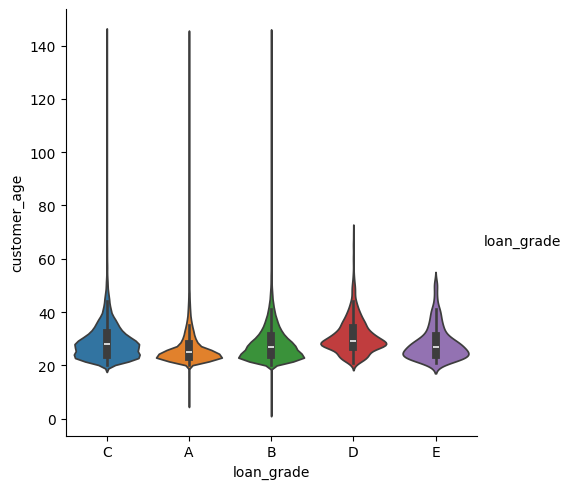

In [44]:
#loan_grade vs customer_age (violin plot)

sns.catplot(x="loan_grade",y="customer_age",data=df,kind="violin",hue="loan_grade")

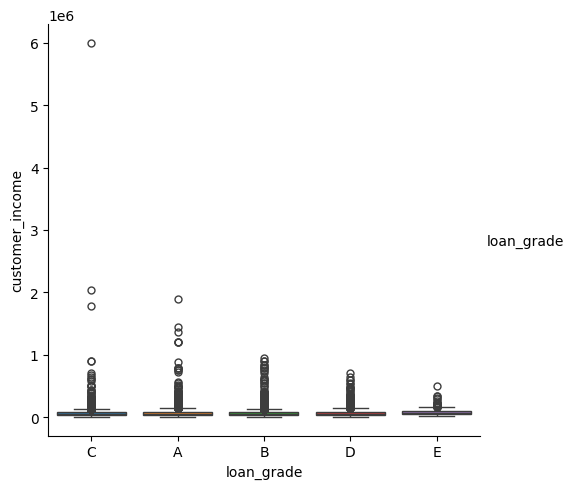

In [45]:
#loan_grade vs customer_income (box plot)

sns.catplot(x="loan_grade",y="customer_income",data=df,kind="box",hue="loan_grade")

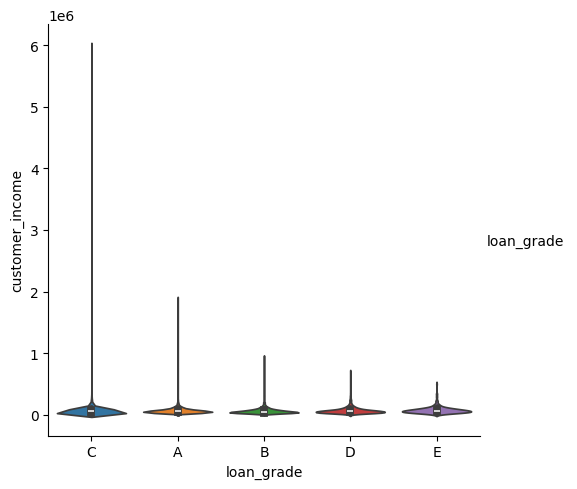

In [46]:
#loan_grade vs customer_income (violin plot)

sns.catplot(x="loan_grade",y="customer_income",data=df,kind="violin",hue="loan_grade")

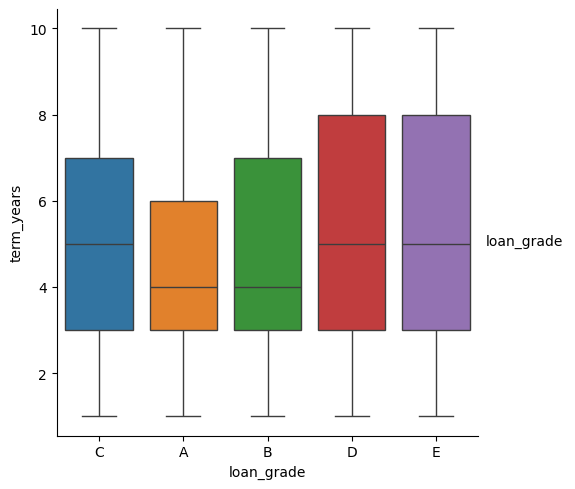

In [47]:
#loan_grade vs term_years (box plot)

sns.catplot(x="loan_grade",y="term_years",data=df,kind="box",hue="loan_grade")

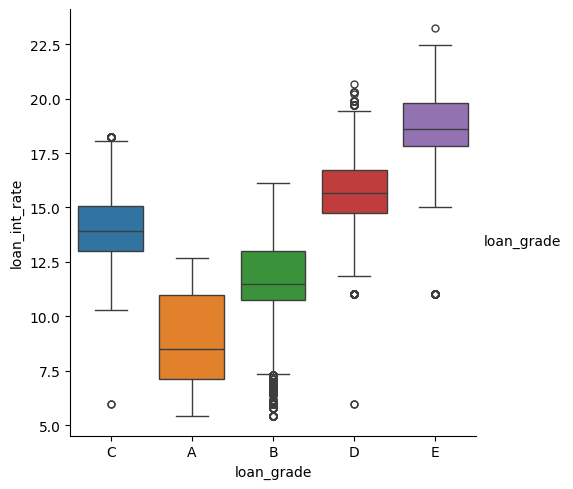

In [48]:
#loan_grade vs loan_int_rate (box plot)

sns.catplot(x="loan_grade",y="loan_int_rate",data=df,kind="box",hue="loan_grade")


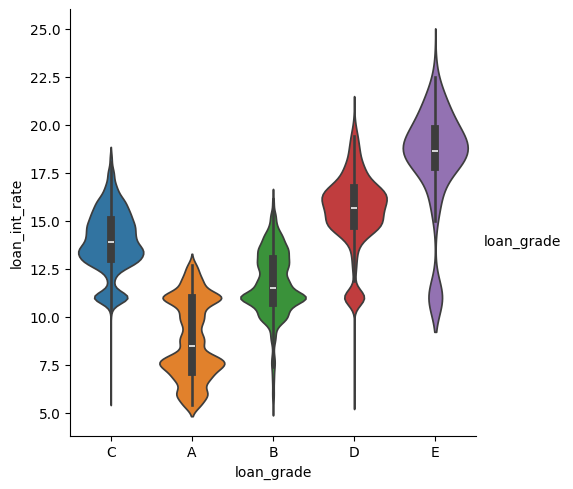

In [49]:
#loan_grade vs loan_int_rate (violin plot)

sns.catplot(x="loan_grade",y="loan_int_rate",data=df,kind="violin",hue="loan_grade")

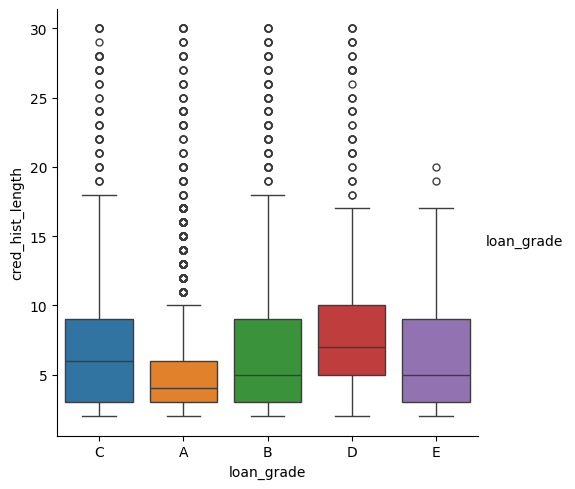

In [50]:
#loan_grade vs cred_hist_length (box plot)

sns.catplot(x="loan_grade",y="cred_hist_length",data=df,kind="box",hue="loan_grade")

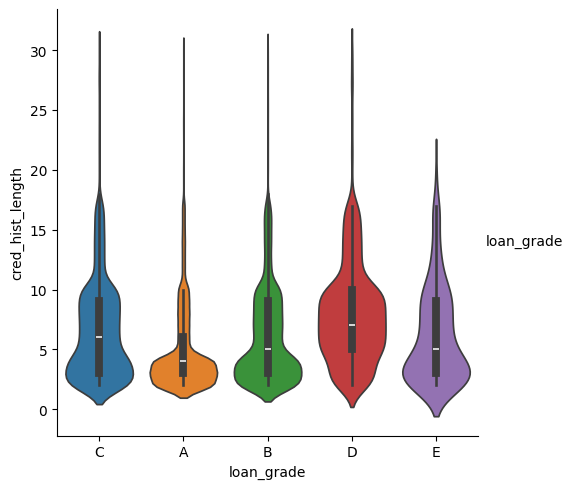

In [51]:
#loan_grade vs cred_hist_length (violin plot)

sns.catplot(x="loan_grade",y="cred_hist_length",data=df,kind="violin",hue="loan_grade")

In [52]:
df.shape

(32578, 17)

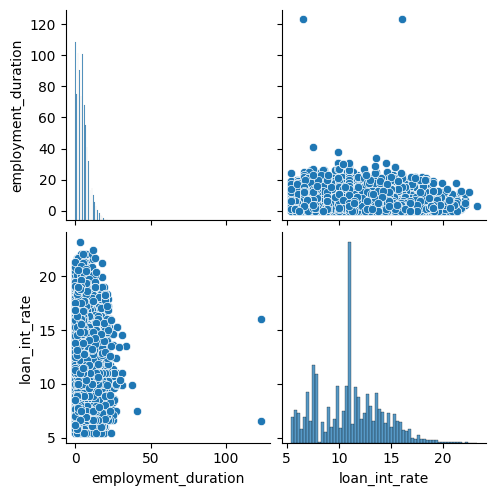

In [53]:
#employement_duration vs loan_int_rate (pairplot)

sns.pairplot(df[["employment_duration","loan_int_rate"]])

### Step-5 Transforming Data

In [54]:
df.shape

(32578, 17)

In [55]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_grade,loan_int_rate,term_years,cred_hist_length,Current_loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,loan_amount
0,1.0,22,59000,1,123.0,C,16.02,10,3,1,0,0,0,0,1,0,35000.0
1,2.0,21,9600,4,5.0,A,11.14,1,2,0,0,1,0,0,0,0,1000.0
2,3.0,25,9600,3,1.0,B,12.87,5,3,1,0,0,0,1,0,0,5500.0
3,4.0,23,65500,1,4.0,B,15.23,10,2,1,0,0,0,1,0,0,35000.0
4,5.0,24,54400,1,8.0,B,14.27,10,4,1,0,0,0,1,0,0,35000.0


In [56]:
print(df.isnull().sum())  # Check for null values in columns


customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_grade             0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
DEBTCONSOLIDATION      0
EDUCATION              0
HOMEIMPROVEMENT        0
MEDICAL                0
PERSONAL               0
VENTURE                0
loan_amount            0
dtype: int64


In [57]:
df.shape

(32578, 17)

In [58]:
df.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_grade', 'loan_int_rate', 'term_years',
       'cred_hist_length', 'Current_loan_status', 'DEBTCONSOLIDATION',
       'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE',
       'loan_amount'],
      dtype='object')

In [59]:
df["loan_grade"].replace(["A","B","C","D","E"],[1,2,3,4,5],inplace=True)

In [60]:
x=df.drop(["loan_grade"],axis=1)
y=df["loan_grade"]

In [61]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
x_new=pd.DataFrame(scaled_x,columns=x.columns)

### Step-6 Splitting data into train and test

In [62]:
df.shape

(32578, 17)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.25)

In [65]:
x_test.shape

(8145, 16)

### MODEL BUILDING

In [69]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('MLP', MLPClassifier(max_iter=500)),
    ('Extra Trees',ExtraTreesClassifier())
]

In [70]:
best_model=""
best_accuracy=0

In [71]:
for name,model in models:
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_test_predicted)
    report=classification_report(y_test,y_test_predicted)
    if accuracy > best_accuracy:
        best_model= name
        best_accuracy = accuracy

### RESULTS

In [72]:
print(best_model)
print(best_accuracy)

Decision Tree
0.9030079803560467


              precision    recall  f1-score   support

           1       0.95      0.95      0.95      3953
           2       0.89      0.89      0.89      2215
           3       0.86      0.85      0.85      1224
           4       0.81      0.83      0.82       663
           5       0.56      0.51      0.53        90

    accuracy                           0.90      8145
   macro avg       0.81      0.81      0.81      8145
weighted avg       0.90      0.90      0.90      8145



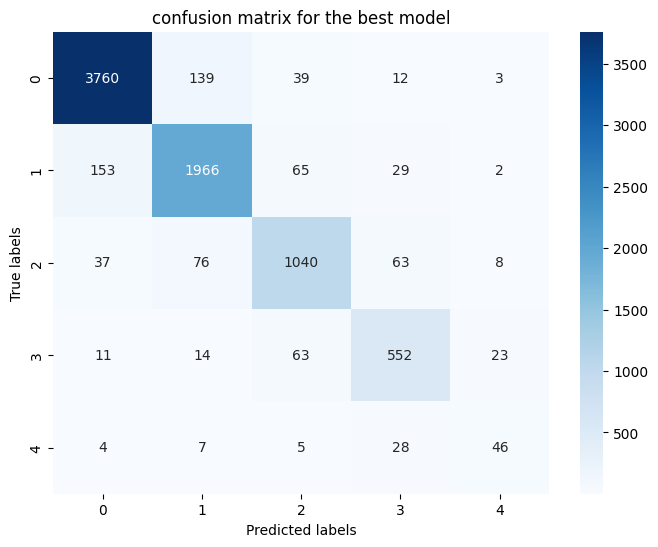

In [74]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_predicted=classifier.predict(x_test)
print(classification_report(y_test,y_predicted))
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("confusion matrix for the best model")
plt.show()